# Project Title: Credit Card Fraud Detection

This dataset consists of credit card transactions in the western United States. It includes information about each transaction including customer details, the merchant and category of purchase, and whether or not the transaction was a fraud.


## Problem Statement:
The objective is to detect fraud transactions, there is significant risk faced by credit card companies and customers when a card is lost or stolen. Credit cards do not require user authentication. When a fraud occurs, customers are liable to pay or when customers don’t pay for fraud transactions credit card companies make financial losses. Also, if a credit card company doesn’t detect fraud transactions, they risk customer churn. For the mentioned reasons its vital to address this problem. 


## Proposed Solution:
The solution proposed is to employ machine learning algorithm for classification of fraud and non-fraud transactions to help predict fraud on new transactions. Also, most transactions are not fraud. And a machine learning algorithm needs transactions of both classes to learn patterns and differentiate between the two classes. However, handling of class imbalance by using under sampling would lead to losing majority of data. And data is vital, so for this reason, oversampling will be done by using SMOTE which creates synthetic data points for the minority class. And finally, different classification algorithms will be employed to assess the performance of these models and choose the best model for the final solution.


[Source](https://app.datacamp.com/search/workspace?q=credit+card) of dataset. The data was partially cleaned and adapted by DataCamp.

## Data Dictionary

|    Column Name      |            Column Description               |
|---------------------|---------------------------------------------|
| transdatetrans_time | Transaction DateTime                        |
| merchant            | Merchant Name                               |
| category            | Category of Merchant                        |
| amt                 | Amount of Transaction                       |
| city                | City of Credit Card Holder                  |
| state               | State of Credit Card Holder                 |
| lat                 | Latitude Location of Purchase               |
| long                | Longitude Location of Purchase              |
| city_pop            | Credit Card Holder's City Population        |
| job                 | Job of Credit Card Holder                   |
| dob                 | Date of Birth of Credit Card Holder         |
| trans_num           | Transaction Number                          |
| merch_lat           | Latitude Location of Merchant               |
| merch_long          | Longitude Location of Merchant              |
| is_fraud            | Whether Transaction is Fraud (1) or Not (0) |

# Importing the data frame

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ccf = pd.read_csv('credit_card_fraud.csv')
ccf.head(5)

,trans_date_trans_time,merchant,category,amt,city,state,lat,long,city_pop,job,dob,trans_num,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:44,"Heller, Gutmann and Zieme",grocery_pos,107.23,Orient,WA,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,49.159047,-118.186462,0
1,2019-01-01 00:00:51,Lind-Buckridge,entertainment,220.11,Malad City,ID,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,43.150704,-112.154481,0
2,2019-01-01 00:07:27,Kiehn Inc,grocery_pos,96.29,Grenada,CA,41.6125,-122.5258,589,Systems analyst,1945-12-21,413636e759663f264aae1819a4d4f231,41.657520,-122.230347,0
3,2019-01-01 00:09:03,Beier-Hyatt,shopping_pos,7.77,High Rolls Mountain Park,NM,32.9396,-105.8189,899,Naval architect,1967-08-30,8a6293af5ed278dea14448ded2685fea,32.863258,-106.520205,0
4,2019-01-01 00:21:32,Bruen-Yost,misc_pos,6.85,Freedom,WY,43.0172,-111.0292,471,"Education officer, museum",1967-08-02,f3c43d336e92a44fc2fb67058d5949e3,43.753735,-111.454923,0


# Exploring the data frame:

### Checking dtypes, missing values, dupliacates, distributions of columns

In [2]:
ccf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 339607 entries, 0 to 339606
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   trans_date_trans_time  339607 non-null  object 
 1   merchant               339607 non-null  object 
 2   category               339607 non-null  object 
 3   amt                    339607 non-null  float64
 4   city                   339607 non-null  object 
 5   state                  339607 non-null  object 
 6   lat                    339607 non-null  float64
 7   long                   339607 non-null  float64
 8   city_pop               339607 non-null  int64  
 9   job                    339607 non-null  object 
 10  dob                    339607 non-null  object 
 11  trans_num              339607 non-null  object 
 12  merch_lat              339607 non-null  float64
 13  merch_long             339607 non-null  float64
 14  is_fraud               339607 non-nu

trans_date_trans_time,dob needs to be converted from object to date and the dtypes of all other columns seem appropriate

In [3]:
ccf.describe()

,amt,lat,long,city_pop,merch_lat,merch_long,is_fraud
count,339607.000000,339607.000000,339607.000000,3.396070e+05,339607.000000,339607.000000,339607.000000
mean,70.577984,39.718991,-110.622605,1.071409e+05,39.718853,-110.622383,0.005247
std,161.675242,5.094961,12.651370,2.930299e+05,5.130894,12.663998,0.072248
min,1.000000,20.027100,-165.672300,4.600000e+01,19.027422,-166.671575,0.000000
25%,9.600000,36.715400,-120.093600,4.710000e+02,36.817194,-119.823755,0.000000
50%,46.460000,39.617100,-111.098500,1.645000e+03,39.586209,-111.036443,0.000000
75%,83.350000,41.710000,-100.621500,3.543900e+04,42.193072,-100.353096,0.000000
max,28948.900000,66.693300,-89.628700,2.383912e+06,67.510267,-88.629203,1.000000


The min and max values of the columns make sense so far

In [4]:
ccf.describe(include=object)

,trans_date_trans_time,merchant,category,city,state,job,dob,trans_num
count,339607,339607,339607,339607,339607,339607,339607,339607
unique,338504,693,14,176,13,163,187,339607
top,2019-12-09 17:30:34,Kilback LLC,gas_transport,Phoenix,CA,"Surveyor, minerals",1987-04-23,1f76529f8574734946361c461b024d99
freq,3,1149,35089,7297,80495,6589,4386,1


Further analysis of qualitative columns needs to be done

In [5]:
ccf.isna().sum()

trans_date_trans_time    0
merchant                 0
category                 0
amt                      0
city                     0
state                    0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

It seems the dataframe has no missing values

In [6]:
ccf.duplicated().sum()

0

It seems there are no duplicated transactions which is good

# Converting columns to appropriate type

In [7]:
import dateutil.parser
ccf['trans_date_trans_time'] = ccf['trans_date_trans_time'].apply(dateutil.parser.parse)
ccf['dob'] = ccf['dob'].apply(dateutil.parser.parse)

using dateutil.parser to convert dates in object type to appropriate type

In [8]:
max_year = pd.to_datetime(ccf['trans_date_trans_time']).dt.year.max()
ccf['age'] = max_year - pd.to_datetime(ccf['dob']).dt.year
print(ccf['age'].describe())

count    339607.000000
mean         48.267344
std          16.986138
min          19.000000
25%          35.000000
50%          46.000000
75%          59.000000
max          93.000000
Name: age, dtype: float64


To find age of customer instead of using current year we can find the year of latest transaction to find the ages of customers as using current year will give higher ages than in reality.

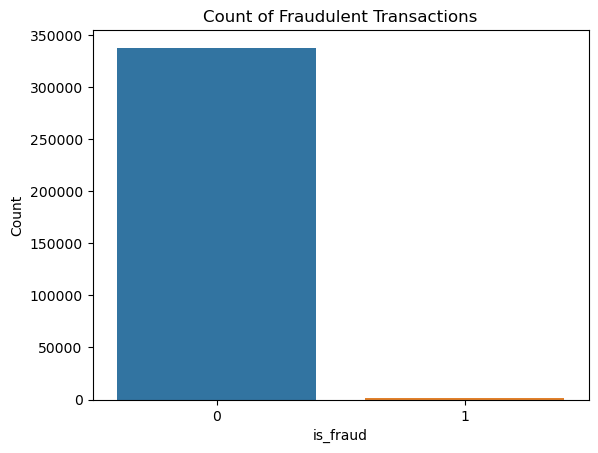

In [9]:
sns.countplot(x='is_fraud', data=ccf)
plt.title('Count of Fraudulent Transactions')
plt.xlabel('is_fraud')
plt.ylabel('Count')
plt.show()

In [10]:
ccf['is_fraud'].value_counts(normalize=True)

is_fraud
0    0.994753
1    0.005247
Name: proportion, dtype: float64

we can observe 99% of the transactions are normal and only 0.005% of the transactions are fraud inorder to use a machine learning algorithm we need more data but this is not possible as most transactions will always be authentic. To solve this sampling may need to be used

In [11]:
print("The transactions are from the year ",ccf['trans_date_trans_time'].min().year," to the year ",
      ccf['trans_date_trans_time'].max().year)
print(f"There are {ccf['merchant'].nunique()} unique merchants")
print(f"There are {ccf['trans_num'].nunique()} customers")

The transactions are from the year  2019  to the year  2020
There are 693 unique merchants
There are 339607 customers


# Exploring qualitative columns for consistency

In [12]:
ccf['merchant'].value_counts().sort_values(ascending=True).head(20)

merchant
Lynch-Moh                          171
Jerde-Hermann                      184
Kris-Kertzmann                     186
Ebert-Daugherty                    191
Johnston-Caspe                     191
Kunze, Larkin and Mayert           192
Ritchie, Bradtke and Stiedemann    195
Wuckert-Walte                      195
Kessler Group                      195
Breitenberg LLC                    196
Douglas, DuBuque and McKenzie      196
Satterfield-Lowe                   196
Kohler, Lindgren and Koelpin       197
Ritchie, Oberbrunner and Cremin    198
Paucek-Wiz                         199
Romaguera and Sons                 200
Kozey-McDermott                    201
Hahn, Douglas and Schowalte        201
Lemke and Sons                     202
Tillman LLC                        202
Name: count, dtype: int64

Analyzing merchant names is out of scope so going forward with the assumption these are all valid merchants, as there are not merchant with few transaction we can assume they are all valid

In [13]:
ccf['category'].unique()

array(['grocery_pos', 'entertainment', 'shopping_pos', 'misc_pos',
       'shopping_net', 'gas_transport', 'misc_net', 'grocery_net',
       'food_dining', 'health_fitness', 'kids_pets', 'home',
       'personal_care', 'travel'], dtype=object)

In [14]:
ccf['category'].value_counts()

category
gas_transport     35089
grocery_pos       32732
home              32516
shopping_pos      30329
kids_pets         29704
shopping_net      26379
personal_care     24406
entertainment     24222
food_dining       23038
health_fitness    22593
misc_pos          20024
misc_net          16898
grocery_net       11355
travel            10322
Name: count, dtype: int64

The category column seems to have consistent classifications

In [15]:
print("The transactions are from ", ccf['city'].nunique()," cities")

The transactions are from  176  cities


In [16]:
ccf['city'].value_counts().sort_values(ascending=True).head(20)

city
Vacaville          7
Wappapello         8
Buellton           8
Pleasant Hill      8
Downey            10
Seligman          10
Kirtland          10
Angwin            10
La Grande         12
Kaktovik          12
Craig             14
Coulee Dam        15
Seattle           19
Hubbell           19
Cardwell         729
Woods Cross      730
Vancouver        730
Odessa           731
Powell Butte     732
Lamy             733
Name: count, dtype: int64

The city columns seems to have consistent values

In [17]:
print("The transactions are from ", ccf['state'].nunique()," states")

The transactions are from  13  states


In [18]:
ccf['state'].value_counts().sort_values(ascending=True)

state
AK     2963
HI     3649
ID     8035
UT    15357
AZ    15362
CO    19766
NM    23427
OR    26408
WA    27040
WY    27776
NE    34425
MO    54904
CA    80495
Name: count, dtype: int64

The state column has transactions across the states with no odd names

In [19]:
print("The transactions are made by customers having ", ccf['job'].nunique()," unique job titles")

The transactions are made by customers having  163  unique job titles


In [20]:
ccf['job'].value_counts().sort_values(ascending=True).head(15)

job
Clinical cytogeneticist                    7
Information officer                        8
Research scientist (medical)               8
Systems developer                          9
Landscape architect                        9
TEFL teacher                              10
Development worker, international aid     10
Fine artist                               10
Accountant, chartered                     11
Industrial/product designer               11
Careers information officer               12
Engineer, site                            12
Commissioning editor                      14
Set designer                              19
Television floor manager                 729
Name: count, dtype: int64

The jobs of customers are consistent and make sense

Finally, transaction number is only used to uniquely identify transactions and won't help in fraud detection

# Checking numerical columns for outliers

NOTE: though lat,long, merch_lat, merch_long are numerical columns we already concluded they have no outliers by checking their min and max values using descibe previously.
    Also, is_fraud is a flag column with 0 or 1 which was confirmed in describe so no need to check for outliers

city_pop, dob will not help the analysis as city_pop should not affect whether a transaction is fraud or not and since we created age column we don't need dob

The only columns we need to check is amt, age


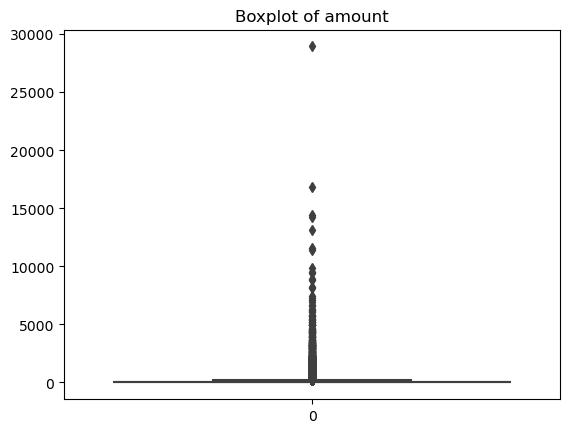

In [21]:
sns.boxplot(ccf['amt'])
plt.title("Boxplot of amount")
plt.show()

There seem to be extreme data points so the machine learning model to be used for fraud detection needs to be choosen carefully.

Algorithms which are affected by outliers such as logistic regression cannot be used unless these outliers are handled

In [22]:
ccf['is_fraud'].value_counts()

is_fraud
0    337825
1      1782
Name: count, dtype: int64

In [23]:
ccf[(ccf['amt'] > 0) & (ccf['amt'] < 2000)]['is_fraud'].value_counts()


is_fraud
0    337604
1      1782
Name: count, dtype: int64

### Initital Findings
it seems all the fraud transactions are for transactions under amount 2000

In [24]:
ccf[(ccf['amt'] > 2000) & (ccf['amt'] < ccf['amt'].max())]['is_fraud'].value_counts()


is_fraud
0    220
Name: count, dtype: int64

But the algorithm needs to learn real patterns if we remove transactions with amounts greater than 2000 which are not fraud algorithms will not learn this. Instead we can use algorithms like decision tree and random forest regression

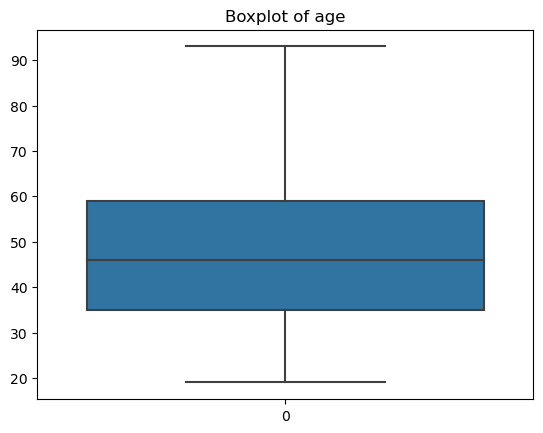

In [25]:
sns.boxplot(ccf['age'])
plt.title("Boxplot of age")
plt.show()

The age column seems to have no outliers

We cannot give datetime column directly to machine learning models so extracting year,date,month,day,hour and dayofweek of transaction

In [26]:
ccf['trans_year'] = ccf['trans_date_trans_time'].dt.year
ccf['trans_month'] = ccf['trans_date_trans_time'].dt.month
ccf['trans_day'] = ccf['trans_date_trans_time'].dt.day
ccf['trans_hour'] = ccf['trans_date_trans_time'].dt.hour
ccf['trans_day_of_week'] = ccf['trans_date_trans_time'].dt.dayofweek

In [27]:
ccf.dtypes

trans_date_trans_time    datetime64[ns]
merchant                         object
category                         object
amt                             float64
city                             object
state                            object
lat                             float64
long                            float64
city_pop                          int64
job                              object
dob                      datetime64[ns]
trans_num                        object
merch_lat                       float64
merch_long                      float64
is_fraud                          int64
age                               int32
trans_year                        int32
trans_month                       int32
trans_day                         int32
trans_hour                        int32
trans_day_of_week                 int32
dtype: object

# Using label encoding for categorical columns

I have tried using one-hot encoding and then using logistic regression. But the issue is after one-hot encoding the dataset has over 500 columns. This is because we have 5 categorical columns where just merchant column have over 600 unique value leading to curse of dimensionality. As logistic regresion is affected by ordinality we cannot use label encoding and I tried running the algorithm still with one-hot encoding but it's taking so much time and its not a viable solution.

As decision tree is not affected by ordinality we can use label encoding,From analysis, we earlier found all fraud transactions are under 2000. So removing the extreme points will prevent the model from predicting fraud. So I have choosen to keep the extreme points as decision tree doesn't calculate distance of data points and decision trees are robust to outliers. So removing potential outliers is not necessary. 

In [28]:
from sklearn.preprocessing import LabelEncoder

categorical_cols = ['merchant', 'category', 'city', 'state', 'job']

label_encoder = LabelEncoder()
for col in categorical_cols:
    ccf[col + '_encoded'] = label_encoder.fit_transform(ccf[col])

Before using machine learning model we need to handle imbalance of dataset

In [29]:
ccf['is_fraud'].value_counts()

is_fraud
0    337825
1      1782
Name: count, dtype: int64

In [30]:
features = ['amt','lat','long','merch_lat','merch_long','age',
            'trans_year', 'trans_month','trans_day', 'trans_day_of_week',
             'merchant_encoded','category_encoded', 'city_encoded', 'state_encoded', 'job_encoded'
            ]
X = ccf[features]
y = ccf['is_fraud']

In [31]:
X.shape, y.shape

((339607, 15), (339607,))

!pip install --upgrade imbalanced-learn scikit-learn

# Creating train-test split 

In [32]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

In [33]:
from imblearn.over_sampling import SMOTE

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((271685, 15), (67922, 15), (271685,), (67922,))

The train test split is done before oversampling because the test set should not be oversampled. We can train the model with oversampled data generation methods like SMOTE but the model should be tested on original test data

# Use SMOTE to handle class imbalance

In [36]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [37]:
X_train_resampled.shape,y_train_resampled.shape

((540540, 15), (540540,))

In [38]:
y_train_resampled.value_counts()

is_fraud
0    270270
1    270270
Name: count, dtype: int64

The class imbalance has been handled by using SMOTE now we can try ML models to make fraud prediction

# Using Decision Tree for Fraud Prediction on resampled data

In [39]:
dtc_noHyperparameters = DecisionTreeClassifier(random_state=42)
dtc_noHyperparameters.fit(X_train_resampled, y_train_resampled)

DecisionTreeClassifier(random_state=42)

In [40]:
y_pred_test_dtc_noHyperparameters = dtc_noHyperparameters.predict(X_test)
y_pred_train_dtc_noHyperparameters = dtc_noHyperparameters.predict(X_train_resampled)

In [41]:
depth_of_tree = dtc_noHyperparameters.tree_.max_depth
print("Depth of the Decision Tree:", depth_of_tree)
feature_importances = dtc_noHyperparameters.feature_importances_
print("Feature Importances:", feature_importances)
num_nodes = dtc_noHyperparameters.tree_.node_count
print("Number of Nodes:", num_nodes)
num_leaves = dtc_noHyperparameters.tree_.n_leaves
print("Number of Leaves:", num_leaves)

Depth of the Decision Tree: 42
Feature Importances: [0.71355195 0.01584101 0.01890008 0.0077846  0.00472052 0.02228025
 0.00810884 0.01168894 0.00991788 0.01610918 0.01530515 0.10865163
 0.01682603 0.01276118 0.01755276]
Number of Nodes: 6691
Number of Leaves: 3346


This decision tree was only to assess performance of model with no hyperparameters, also we observed shape of tree and importance of features. The most important feature determining a transaction  being fraud or not is amount(amt) column

In [42]:
print("Test Classification Report for Decision Tree Classification with no hyperparameters:")
print(classification_report(y_test, y_pred_test_dtc_noHyperparameters))
print("Train Classification Report for Decision Tree Classification with no hyperparameters:")
print(classification_report(y_train_resampled, y_pred_train_dtc_noHyperparameters))

Test Classification Report for Decision Tree Classification with no hyperparameters:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     67555
           1       0.38      0.67      0.49       367

    accuracy                           0.99     67922
   macro avg       0.69      0.83      0.74     67922
weighted avg       0.99      0.99      0.99     67922

Train Classification Report for Decision Tree Classification with no hyperparameters:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    270270
           1       1.00      1.00      1.00    270270

    accuracy                           1.00    540540
   macro avg       1.00      1.00      1.00    540540
weighted avg       1.00      1.00      1.00    540540



On data resampled by SMOTE decision tree with no hyperparameters decision tree is overfitting

Controlling depth, max_features selected when branching of decision tree to handle overfit, but it it important to note since we used SMOTE to create synthetic data for handling class imbalance, this was expected. Also, we didn't resample test data as we want to test the model on original and authentic data not on synthetic data.

In [43]:
dtc = DecisionTreeClassifier(random_state=42,max_depth=35,max_features='sqrt')
dtc.fit(X_train_resampled, y_train_resampled)

DecisionTreeClassifier(max_depth=35, max_features='sqrt', random_state=42)

In [44]:
y_pred_test_dtc = dtc.predict(X_test)
y_pred_train_dtc = dtc.predict(X_train_resampled)

In [45]:
depth_of_tree = dtc.tree_.max_depth
print("Depth of the Decision Tree:", depth_of_tree)
feature_importances = dtc.feature_importances_
print("Feature Importances:", feature_importances)
num_nodes = dtc.tree_.node_count
print("Number of Nodes:", num_nodes)
num_leaves = dtc.tree_.n_leaves
print("Number of Leaves:", num_leaves)

Depth of the Decision Tree: 35
Feature Importances: [0.6710115  0.02431335 0.02584308 0.018691   0.01587999 0.0214068
 0.01353741 0.02522903 0.01982894 0.01777676 0.02165158 0.05558289
 0.02351915 0.02185714 0.02387138]
Number of Nodes: 10843
Number of Leaves: 5422


In [46]:
print("Test Classification Report for Decision Tree Classification with hyperparameters:")
print(classification_report(y_test, y_pred_test_dtc))
print("Train Classification Report for Decision Tree Classification with hyperparameters:")
print(classification_report(y_train_resampled, y_pred_train_dtc))

Test Classification Report for Decision Tree Classification with hyperparameters:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     67555
           1       0.34      0.66      0.45       367

    accuracy                           0.99     67922
   macro avg       0.67      0.83      0.72     67922
weighted avg       0.99      0.99      0.99     67922

Train Classification Report for Decision Tree Classification with hyperparameters:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    270270
           1       1.00      1.00      1.00    270270

    accuracy                           1.00    540540
   macro avg       1.00      1.00      1.00    540540
weighted avg       1.00      1.00      1.00    540540



By Controlling depth and hyperparameters on resampled data the overfit has increased on decision tree

Now,Lets try Random forest regression on resampled data to improve model performance

In [47]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=42,n_estimators = 300,max_depth=35,max_features='sqrt')
rfc.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(max_depth=35, n_estimators=300, random_state=42)

In [48]:
y_pred_test_rfc = rfc.predict(X_test)
y_pred_train_rfc = rfc.predict(X_train_resampled)

In [49]:
print("Test Classification Report for Random Forest regression with hyperparameters:")
print(classification_report(y_test, y_pred_test_rfc))
print("Train Classification Report for Random Forest regression with hyperparameters:")
print(classification_report(y_train_resampled, y_pred_train_rfc))

Test Classification Report for Random Forest regression with hyperparameters:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     67555
           1       0.76      0.69      0.72       367

    accuracy                           1.00     67922
   macro avg       0.88      0.85      0.86     67922
weighted avg       1.00      1.00      1.00     67922

Train Classification Report for Random Forest regression with hyperparameters:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    270270
           1       1.00      1.00      1.00    270270

    accuracy                           1.00    540540
   macro avg       1.00      1.00      1.00    540540
weighted avg       1.00      1.00      1.00    540540



The accuracy has risen considerably, from the analysis done before building the models we know all the frauds are under transactions with amount less than 2000. The accuracy of all models on train set is always 100%.

In [50]:
dtc_depth1 = DecisionTreeClassifier(random_state=42,max_depth=1,max_features='sqrt')
dtc_depth1.fit(X_train_resampled, y_train_resampled)
y_pred_test_dtc_depth1 = dtc_depth1.predict(X_test)
y_pred_train_dtc_depth1 = dtc_depth1.predict(X_train_resampled)
print("Test Classification Report for Decision Tree Classification with hyperparameters:")
print(classification_report(y_test, y_pred_test_dtc_depth1))
print("Train Classification Report for Decision Tree Classification with hyperparameters:")
print(classification_report(y_train_resampled, y_pred_train_dtc_depth1))

Test Classification Report for Decision Tree Classification with hyperparameters:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     67555
           1       0.13      0.74      0.22       367

    accuracy                           0.97     67922
   macro avg       0.56      0.86      0.60     67922
weighted avg       0.99      0.97      0.98     67922

Train Classification Report for Decision Tree Classification with hyperparameters:
              precision    recall  f1-score   support

           0       0.79      0.97      0.87    270270
           1       0.97      0.74      0.84    270270

    accuracy                           0.86    540540
   macro avg       0.88      0.86      0.86    540540
weighted avg       0.88      0.86      0.86    540540



 I have tried tuning the models even upto max depth 1 still the train set always has close to perfect accuracy, Indicating the data is quite simple. And the model is easily figuring out the pattern for training data. And since smote creates syntehic data points the accuracy is bad on test data as its not representative of real data

# Since Synthetic data is degrading the performance of models we can also try Fraud prediction on imbalanced data in some cases it can work

In [51]:
dtc = DecisionTreeClassifier(random_state=42,max_depth=35,max_features='sqrt')
dtc.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=35, max_features='sqrt', random_state=42)

In [52]:
y_pred_test_dtc = dtc.predict(X_test)
y_pred_train_dtc = dtc.predict(X_train)

In [53]:
print("Test Classification Report for Decision Tree Classification:")
print(classification_report(y_test, y_pred_test_dtc))
print("Train Classification Report for Decision Tree Classification:")
print(classification_report(y_train, y_pred_train_dtc))

Test Classification Report for Decision Tree Classification:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     67555
           1       0.58      0.54      0.56       367

    accuracy                           1.00     67922
   macro avg       0.79      0.77      0.78     67922
weighted avg       1.00      1.00      1.00     67922

Train Classification Report for Decision Tree Classification:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    270270
           1       1.00      1.00      1.00      1415

    accuracy                           1.00    271685
   macro avg       1.00      1.00      1.00    271685
weighted avg       1.00      1.00      1.00    271685



Fraud prediction on decision tree without resampling has much better accuracy, as model was trained and tested on real data

So, lets try random forest classifier on original data without resampling since decision tree has better accuracy on original data

In [54]:
rfc = RandomForestClassifier(random_state=42,n_estimators = 300,max_depth=14,max_features='sqrt')
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=14, n_estimators=300, random_state=42)

In [55]:
y_pred_test_rfc = rfc.predict(X_test)
y_pred_train_rfc = rfc.predict(X_train)

In [56]:
print("Test Classification Report for Random Forest regression:")
print(classification_report(y_test, y_pred_test_rfc))
print("Train Classification Report for Random Forest regression:")
print(classification_report(y_train, y_pred_train_rfc))

Test Classification Report for Random Forest regression:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     67555
           1       0.95      0.49      0.65       367

    accuracy                           1.00     67922
   macro avg       0.97      0.74      0.82     67922
weighted avg       1.00      1.00      1.00     67922

Train Classification Report for Random Forest regression:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    270270
           1       1.00      0.72      0.83      1415

    accuracy                           1.00    271685
   macro avg       1.00      0.86      0.92    271685
weighted avg       1.00      1.00      1.00    271685



In conclusion, The best model so far is Random forest regression trained on original imbalanced data without sampling which is predicting 95% of the fraud transactions. 

### Overfit cannot be considered as train data has 100% even with max_depth = 1 for decision tree indicating data is very simple as mentioned earlier with all fraud transactions under amount 2000

## Solution:
### Random forest classifier on synthethic data generated using SMOTE has 76% accuracy of predicting fraud and 95% accuracy of predicting fraud on original data. Both models are a viable solution. 